# Common Data Problems:

- Inconsistent Column Names (e.g capitalization, unwanted space)
- Missing data *
- Outliers
- Duplicate rows **
- Untidy
- need to process column(s)
- unexpected data value
- datatype of each column


#### funcs : 
- to check for nulls, **df.info()**
- **df.columns** to list the columns
- **df.shape** well, see the shape!

### See data

In [1]:
import pandas as pd

url = 'https://assets.datacamp.com/production/repositories/666/datasets/b54f64ca50c859e38fd68bcc7c932d09976709b8/dob_job_application_filings_subset.csv'
df = pd.read_csv(url,index_col=0)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert,Pre- Filing Date,...,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
Job #,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
121577873,2,MANHATTAN,386,PARK AVENUE SOUTH,857,38,1016890,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,X,,,,,,,,,,,,DOUGLAS,MASS,PE,0058375,NaN,04/25/2013,...,04/25/2013,NaN,NaN,NaN,$75000.00,$986.00,STANDARD,0,0,NaN,NaN,0,0,0,0,0,0,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JAMES,MIGLIORE,MACKLOWE MANAGEMENT,126,EAST 56TH STREET,NEW YORK,NY,10222,2125545837,GENERAL MECHANICAL & PLUMBING MODIFICATIONS AS...,04/26/2013 12:00:00 AM
520129502,1,STATEN ISLAND,107,KNOX PLACE,342,1,5161350,A3,A,PRE-FILING,04/25/2013,1-2-3 FAMILY,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,BPP,STEVEN,SAVINO,RA,0025259,NaN,04/25/2013,...,NaN,NaN,NaN,NaN,$0.00,$1144.00,STANDARD,0,0,NaN,NaN,0,143,0,0,0,0,,,,,NaN,R2,NaN,NaN,NaN,NaN,NaN,NaN,DAVID,BLUMENBERG,NA,107,KNOX PLACE,STATEN ISLAND,NY,10314,3477398892,BUILDERS PAVEMENT PLAN 143 LF. ...,04/26/2013 12:00:00 AM
121601560,1,MANHATTAN,63,WEST 131 STREET,1729,9,1053831,A2,Q,PERMIT ISSUED - PARTIAL JOB,04/25/2013,OTHER,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,X,,,,,,,,,,,X,GEN. CONSTR.,ASHRAF,ALI,PE,0084178,Y,04/25/2013,...,04/25/2013,NaN,04/25/2013,NaN,$30000.00,$522.50,STANDARD,0,0,NaN,NaN,0,0,5,5,54,54,20,20,RES,RES,NOT APPLICABLE,R7-2,NaN,NaN,NaN,NaN,NaN,NaN,JEREMIE,MARKOWITZ,635 RIVERSIDE DRIVE NY LLC,619,WEST 54TH STREET,NEW YORK,NY,10016,2127652555,GENERAL CONSTRUCTION TO INCLUDE NEW PARTITIONS...,04/26/2013 12:00:00 AM
121601203,1,MANHATTAN,48,WEST 25TH STREET,826,69,1015610,A2,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,STRUCTURAL,J. BUTCH,MACUTAY JR.,PE,0078226,NaN,04/25/2013,...,04/25/2013,NaN,NaN,NaN,$1500.00,$225.00,STANDARD,0,0,NaN,NaN,0,0,12,12,120,120,,,E,E,NOT APPLICABLE,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,CARMINE,CASALE,48 W 25 ST LLC C/O BERNSTEIN,150,WEST 30TH STREET,NEW YORK,NY,10001,2125941414,STRUCTURAL CHANGES ON THE 5TH FLOOR (MOONDOG E...,04/26/2013 12:00:00 AM
121601338,1,MANHATTAN,45,WEST 29 STREET,831,7,1015754,A3,D,APPLICATION PROCESSED - ENTIRE,04/25/2013,OTHER,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,,,,,,,,,,,,X,GEN. CONSTR.,JUNHUI,JIA,PE,0086781,NaN,04/25/2013,...,04/25/2013,NaN,NaN,NaN,$19500.00,$389.50,STANDARD,0,0,NaN,NaN,0,0,6,6,64,64,,,COM,COM,NaN,C6-4X,M1-6,NaN,NaN,NaN,NaN,NaN,HYUNG RO,LEE,HYUNG-HYANG REALTY CORP,614,8 AVENUE,NEW YORK,NY,10001,2019881222,FILING HEREWITH FACADE REPAIR PLANS. WORK SCOP...,04/26/2013 12:00:00 AM


In [0]:
df.shape

(12846, 81)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12846 entries, 121577873 to 520143951
Data columns (total 81 columns):
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 non-null object
Loft Board                 

In [0]:
df.columns

Index(['Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Job Status', 'Job Status Descrp', 'Latest Action Date',
       'Building Type', 'Community - Board', 'Cluster', 'Landmarked',
       'Adult Estab', 'Loft Board', 'City Owned', 'Little e', 'PC Filed',
       'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler', 'Fuel Burning',
       'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm', 'Equipment',
       'Fire Suppression', 'Curb Cut', 'Other', 'Other Description',
       'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Pro

# Exploratory Data Analysis

### Frequency Counts

In [0]:
df.Borough.value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [0]:
df['Professional Cert'].value_counts(dropna=False)

Y      6908
NaN    5938
Name: Professional Cert, dtype: int64

### Numerical analysis

In [0]:
# only numeric types will be retured

df.describe()

,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


# Visual Exploratoty Analysis

- bar plots for discrete data counts
- histogram for continuous data counts
- box plots to visualize summary statistics
- scatter plots, realte two numeric columns

note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

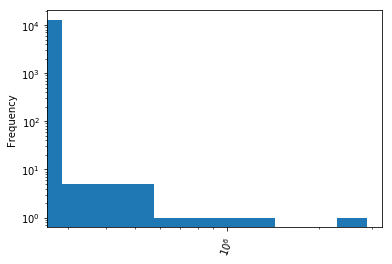

In [0]:
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In [0]:
def func(st):
    if st:
        if st[0]=='$':
            return st[1:]
        else :
            return st
        
        
df['Initial Cost'] = df['Initial Cost'].apply(func).astype('float64');

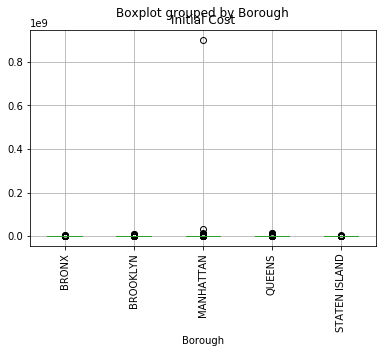

In [0]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

In [0]:
df['Total Est. Fee'] = df['Total Est. Fee'].apply(func).astype('float64');

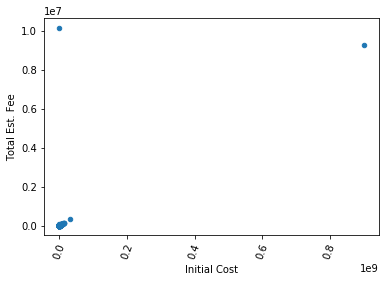

In [0]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

In [0]:
df = df[df['Total Est. Fee']<60000]

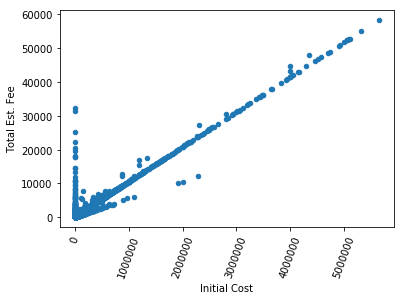

In [0]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='Initial Cost', y='Total Est. Fee', rot=70)
plt.show()

# Tidy data

- "tidy data" paper by Hadley Wickham

### Melting

In [2]:
dc = {
    'name' : ['Daniel','John','Jane'],
    'Treatment A' : [None,12,24],
    'Treatment B' : [42,31,27]
}

df1 = pd.DataFrame(dc)
df1.head()

,name,Treatment A,Treatment B
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


**-->** Treatment types shouldnt be separate columns,  they maybe good for reporting, but not for analysis. so we need to turn them into a sigle column using **pandas melt** . 
There are two parameters you should be aware of: id_vars and value_vars. The id_vars represent the columns of the data you do not want to melt (i.e., keep it in its current shape), while the value_vars represent the columns you do wish to melt into rows. By default, if no value_vars are provided, all columns not set in the id_vars will be melted. This could save a bit of typing, depending on the number of columns that need to be melted.

In [4]:
melted = pd.melt(frame=df1,id_vars='name',value_vars=['Treatment A','Treatment B'],var_name='treatment',value_name='result')

melted

,name,treatment,result
0,Daniel,Treatment A,NaN
1,John,Treatment A,12.0
2,Jane,Treatment A,24.0
3,Daniel,Treatment B,42.0
4,John,Treatment B,31.0
5,Jane,Treatment B,27.0


### Pivoting

Pivoting data is the opposite of melting it. While melting takes a set of columns and turns it into a single column, pivoting will create a new column for each unique value in a specified column. .pivot_table() has an index parameter which you can use to specify the columns that you don't want pivoted: It is similar to the id_vars parameter of pd.melt(). Two other parameters that you have to specify are columns (the name of the column you want to pivot), and values (the values to be used when the column is pivoted). 

In [6]:
pivoted = melted.pivot_table(index=['name'], columns='treatment', values='result')

pivoted

treatment,Treatment A,Treatment B
name,,
Daniel,NaN,42.0
Jane,24.0,27.0
John,12.0,31.0


In [7]:
pivoted.columns

Index(['Treatment A', 'Treatment B'], dtype='object', name='treatment')

In [9]:
pivoted.index

Index(['Daniel', 'Jane', 'John'], dtype='object', name='name')

After pivoting airquality_melt in the previous exercise, you didn't quite get back the original DataFrame.

What you got back instead was a pandas DataFrame with a hierarchical index (also known as a MultiIndex).

Hierarchical indexes are covered in depth in **Manipulating DataFrames with pandas**. In essence, they allow you to group columns or rows by another variable - in this case, by 'Month' as well as 'Day'.

There's a very simple method you can use to get back the original DataFrame from the pivoted DataFrame: .reset_index(). 

In [12]:
new = pivoted.reset_index()

new

treatment,name,Treatment A,Treatment B
0,Daniel,NaN,42.0
1,Jane,24.0,27.0
2,John,12.0,31.0


In [13]:
new.index

RangeIndex(start=0, stop=3, step=1)

#### aggregate function in pivot_table

So far, you've used the .pivot_table() method when there are multiple index values you want to hold constant during a pivot. In the video, Dan showed you how you can also use pivot tables to deal with duplicate values by providing an aggregation function through the aggfunc parameter. Here, you're going to combine both these uses of pivot tables.
You'll see that by using .pivot_table() and the aggfunc parameter, you can not only reshape your data, but also remove duplicates. Finally, you can then flatten the columns of the pivoted DataFrame using .reset_index().

In [26]:
obj = {'name':['Jane'],'treatment':['Treatment B'],'result':[72.0]}

obj

{'name': ['Jane'], 'result': [72.0], 'treatment': ['Treatment B']}

In [27]:
temp = pd.DataFrame(obj)

temp

,name,treatment,result
0,Jane,Treatment B,72.0


In [28]:
dup = melted.append(temp,ignore_index=True)

dup

,name,treatment,result
0,Daniel,Treatment A,NaN
1,John,Treatment A,12.0
2,Jane,Treatment A,24.0
3,Daniel,Treatment B,42.0
4,John,Treatment B,31.0
5,Jane,Treatment B,27.0
6,Jane,Treatment B,72.0


In [31]:
### doesnt work with duplicates
import numpy as np

dup.pivot_table(index=['name'], columns='treatment', values='result', aggfunc=np.mean).reset_index() #it means by deafult also!

treatment,name,Treatment A,Treatment B
0,Daniel,NaN,42.0
1,Jane,24.0,49.5
2,John,12.0,31.0


## single column representing multiple info

#### gender+age group

In [38]:
import pandas as pd

url='https://assets.datacamp.com/production/repositories/666/datasets/cf05b5e01009dd5d61d7db5ac5fb790042e7fd09/tb.csv'
tb = pd.read_csv(url)
tb.head()

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


The dataset you saw in the video, consisting of case counts of tuberculosis by country, year, gender, and age group, has been pre-loaded into a DataFrame as tb.

In this exercise, you're going to tidy the 'm014' column, which represents males aged 0-14 years of age. In order to parse this value, you need to extract the first letter into a new column for gender, and the rest into a column for age_group. Here, since you can parse values by position, you can take advantage of pandas' vectorized string slicing by using the str attribute of columns of type object.

Begin by printing the columns of tb in the IPython Shell using its .columns attribute, and take note of the problematic column.

In [39]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country' , 'year'])

# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

# Create the 'age_group' column
tb_melt['age_group'] =  tb_melt.variable.str[1:]

# Print the head of tb_melt
tb_melt.head()

,country,year,variable,value,gender,age_group
0,AD,2000,m014,0.0,m,014
1,AE,2000,m014,2.0,m,014
2,AF,2000,m014,52.0,m,014
3,AG,2000,m014,0.0,m,014
4,AL,2000,m014,2.0,m,014


In [40]:
tb_melt.tail()

,country,year,variable,value,gender,age_group
3211,YE,2000,fu,NaN,f,u
3212,YU,2000,fu,NaN,f,u
3213,ZA,2000,fu,NaN,f,u
3214,ZM,2000,fu,NaN,f,u
3215,ZW,2000,fu,NaN,f,u


In [42]:
tb_melt[tb_melt['country']=='AE']

,country,year,variable,value,gender,age_group
1,AE,2000,m014,2.0,m,014
202,AE,2000,m1524,4.0,m,1524
403,AE,2000,m2534,4.0,m,2534
604,AE,2000,m3544,6.0,m,3544
805,AE,2000,m4554,5.0,m,4554
1006,AE,2000,m5564,12.0,m,5564
1207,AE,2000,m65,10.0,m,65
1408,AE,2000,mu,NaN,m,u
1609,AE,2000,f014,3.0,f,014
1810,AE,2000,f1524,16.0,f,1524


#### with delims

In [43]:
url = 'https://assets.datacamp.com/production/repositories/666/datasets/6da83b3d2017245217d35989960184234a6c4e7f/ebola.csv'
ebola = pd.read_csv(url)
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [44]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date' , 'Day'], var_name='type_country', value_name='counts')

# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

ebola_melt.head()

,Date,Day,type_country,counts,str_split
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]"
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]"
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]"
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]"
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]"


In [45]:
ebola_melt.tail()

,Date,Day,type_country,counts,str_split
1947,3/27/2014,5,Deaths_Mali,NaN,"[Deaths, Mali]"
1948,3/26/2014,4,Deaths_Mali,NaN,"[Deaths, Mali]"
1949,3/25/2014,3,Deaths_Mali,NaN,"[Deaths, Mali]"
1950,3/24/2014,2,Deaths_Mali,NaN,"[Deaths, Mali]"
1951,3/22/2014,0,Deaths_Mali,NaN,"[Deaths, Mali]"


In [46]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

# Print the head of ebola_melt
ebola_melt.head()

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


### Concatenation